- remove duplicate, no duplicate
- checked the correlation between time and passfail, no strong correlation
- outliers, outliers by z score doesnt seem to correlate to pass fail
- normality, improved by removing extreme outliers
- missing data, deleted features that null% over 0.8, created a feature for null, use median to fill rest of the null
- feature selection, deleted 0 variance features, filter features with ANOVA, filter null_features with chi
- multicollinearity


- create new features
- labeling
- modeling
- hyper parameter tuning

In [485]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import variance
from scipy import stats
from scipy.stats import skew
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [486]:
all_df = pd.read_csv("C:/Users/user/Desktop/UCI SECOM dataset/uci-secom.csv")
all_df.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

In [487]:
all_df.shape

(1567, 592)

In [488]:
# remove row duplicates
all_df.drop_duplicates()
all_df.shape

(1567, 592)

In [489]:
# remove column duplicates
all_df.T.drop_duplicates().T
all_df.shape

(1567, 592)

In [490]:
# データ分割

columnList = all_df.columns.to_list()
columnList.remove('Pass/Fail')
columnList.remove('Time')

X = pd.DataFrame(all_df.loc[:, columnList])
y = pd.DataFrame(all_df.loc[:, ['Pass/Fail']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=939)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1253, 590)
(1253, 1)
(314, 590)
(314, 1)


In [491]:
X_train = X_train.sort_index()
y_train = y_train.sort_index()

# データ可視化

In [492]:
X_train.head()

0        1          2          3       4      5         6       7  \
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
5  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
6  3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   

        8       9  ...     580       581     582     583     584      585  \
1  1.4966 -0.0005  ...  0.0060  208.2045  0.5019  0.0223  0.0055   4.4447   
2  1.4436  0.0041  ...  0.0148   82.8602  0.4958  0.0157  0.0039   3.1745   
4  1.5031 -0.0031  ...     NaN       NaN  0.4800  0.4766  0.1045  99.3032   
5  1.5287  0.0167  ...  0.0052   44.0077  0.4949  0.0189  0.0044   3.8276   
6  1.5816 -0.0270  ...     NaN       NaN  0.5010  0.0143  0.0042   2.8515   

      586     587     588       589  
1  0.0096  0.0201  0.0060  208.2045  
2  0.0584  0.0484  0.0148   82.8602  
4  0.0202  0.0149  0.0044   73.8432  
5  0.0342  0.0151  0.0052   44.0077  
6  0.0342  0.0151  0.0052   44.0077  

[5 rows x 590 columns]

In [493]:
X_train.describe()

0            1            2            3            4  \
count  1248.000000  1248.000000  1240.000000  1240.000000  1240.000000   
mean   3014.132380  2494.926899  2200.243429  1391.252669     4.019431   
std      73.864124    79.433984    30.265396   437.749342    54.638544   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2967.497500  2451.452500  2180.700000  1081.857925     1.016000   
50%    3011.630000  2499.195000  2201.066700  1283.370100     1.307600   
75%    3056.422500  2538.415000  2217.913900  1590.259700     1.518800   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1240.0  1240.000000  1246.000000  1252.000000  1252.000000  ...   
mean    100.0   101.216149     0.121672     1.462894    -0.000386  ...   
std       0.0     6.268219     0.009973     0.073744     0.014980  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    98.016925     0.121100     1.410875    -0.010425  ...   
50%     100.0   101.539450     0.122400     1.461500    -0.000550  ...   
75%     100.0   104.615600     0.123800     1.516600     0.008525  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              580         581          582          583          584  \
count  487.000000  487.000000  1252.000000  1252.000000  1252.000000   
mean     0.005426   97.597681     0.500148     0.015203     0.003813   
std      0.003179   90.331949     0.003417     0.014046     0.003019   
min      0.001000    0.000000     0.480000     0.006800     0.001700   
25%      0.003400   46.436900     0.497900     0.011600     0.003100   
50%      0.004700   72.200200     0.500200     0.013800     0.003600   
75%      0.006500  113.873650     0.502400     0.016600     0.004100   
max      0.028600  737.304800     0.509800     0.476600     0.104500   

               585          586          587          588          589  
count  1252.000000  1253.000000  1253.000000  1253.000000  1253.000000  
mean      3.042414     0.021647     0.016618     0.005320    98.735522  
std       2.912994     0.012575     0.009066     0.002937    94.453587  
min       1.366700    -0.016900     0.003200     0.001000     0.000000  
25%       2.305800     0.013700     0.010600     0.003300    44.175400  
50%       2.763950     0.020700     0.014900     0.004700    71.778000  
75%       3.325925     0.027600     0.020500     0.006400   114.287800  
max      99.303200     0.102800     0.079900     0.028600   737.304800  

[8 rows x 590 columns]

In [494]:
temp = pd.DataFrame(y_train['Pass/Fail'].value_counts()/y_train['Pass/Fail'].count())
temp

Pass/Fail
-1   0.931365
 1   0.068635

<AxesSubplot:ylabel='Pass/Fail'>

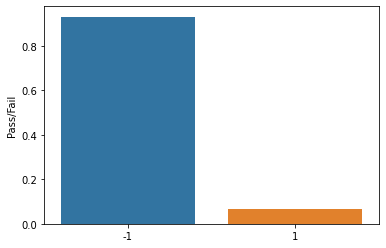

In [495]:
# 目的変数の分布
sns.barplot(x= temp.index,y='Pass/Fail', data=temp)

<AxesSubplot:xlabel='0', ylabel='Count'>

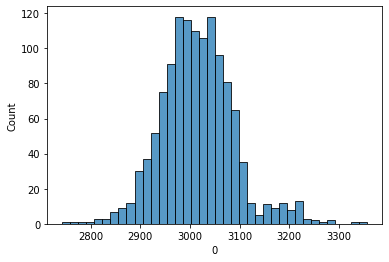

In [496]:
sns.histplot(X_train['0'])

<AxesSubplot:xlabel='5', ylabel='Count'>

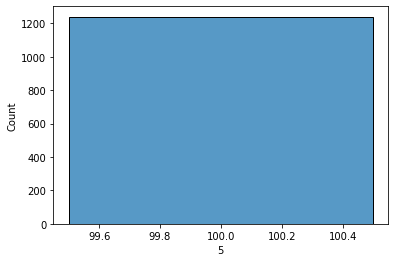

In [497]:
sns.histplot(X_train['5'])

<AxesSubplot:xlabel='109', ylabel='Count'>

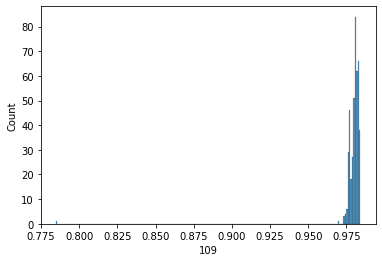

In [498]:
sns.histplot(X_train['109'])

In [499]:
X_train

0        1          2          3       4      5         6       7  \
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
5     2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
6     3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
...       ...      ...        ...        ...     ...    ...       ...     ...   
1560  2770.40  2549.42  2204.2889  2637.9989  1.5549  100.0   86.1089  0.1234   
1561  2951.14  2326.59  2212.6334  1081.5662  1.0096  100.0  113.4278  0.1253   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   98.7978  0.1213   

           8       9  ...     580       581     582     583     584      585  \
1     1.4966 -0.0005  ...  0.0060  208.2045  0.5019  0.0223  0.0055   4.4447   
2     1.4436  0.0041  ...  0.0148   82.8602  0.4958  0.0157  0.0039   3.1745   
4     1.5031 -0.0031  ...     NaN       NaN  0.4800  0.4766  0.1045  99.3032   
5     1.5287  0.0167  ...  0.0052   44.0077  0.4949  0.0189  0.0044   3.8276   
6     1.5816 -0.0270  ...     NaN       NaN  0.5010  0.0143  0.0042   2.8515   
...      ...     ...  ...     ...       ...     ...     ...     ...      ...   
1560  1.2811  0.0037  ...  0.0042  127.3154  0.5009  0.0155  0.0036   3.0997   
1561  1.4492 -0.0134  ...  0.0051   46.4573  0.4965  0.0118  0.0032   2.3817   
1563  1.4333 -0.0061  ...     NaN       NaN  0.4975  0.0131  0.0036   2.6238   
1564     NaN     NaN  ...  0.0025   43.5231  0.4987  0.0153  0.0041   3.0590   
1565  1.4622 -0.0072  ...  0.0075   93.4941  0.5004  0.0178  0.0038   3.5662   

         586     587     588       589  
1     0.0096  0.0201  0.0060  208.2045  
2     0.0584  0.0484  0.0148   82.8602  
4     0.0202  0.0149  0.0044   73.8432  
5     0.0342  0.0151  0.0052   44.0077  
6     0.0342  0.0151  0.0052   44.0077  
...      ...     ...     ...       ...  
1560  0.0105  0.0133  0.0042  127.3154  
1561  0.0320  0.0148  0.0051   46.4573  
1563  0.0068  0.0138  0.0047  203.1720  
1564  0.0197  0.0086  0.0025   43.5231  
1565  0.0262  0.0245  0.0075   93.4941  

[1253 rows x 590 columns]

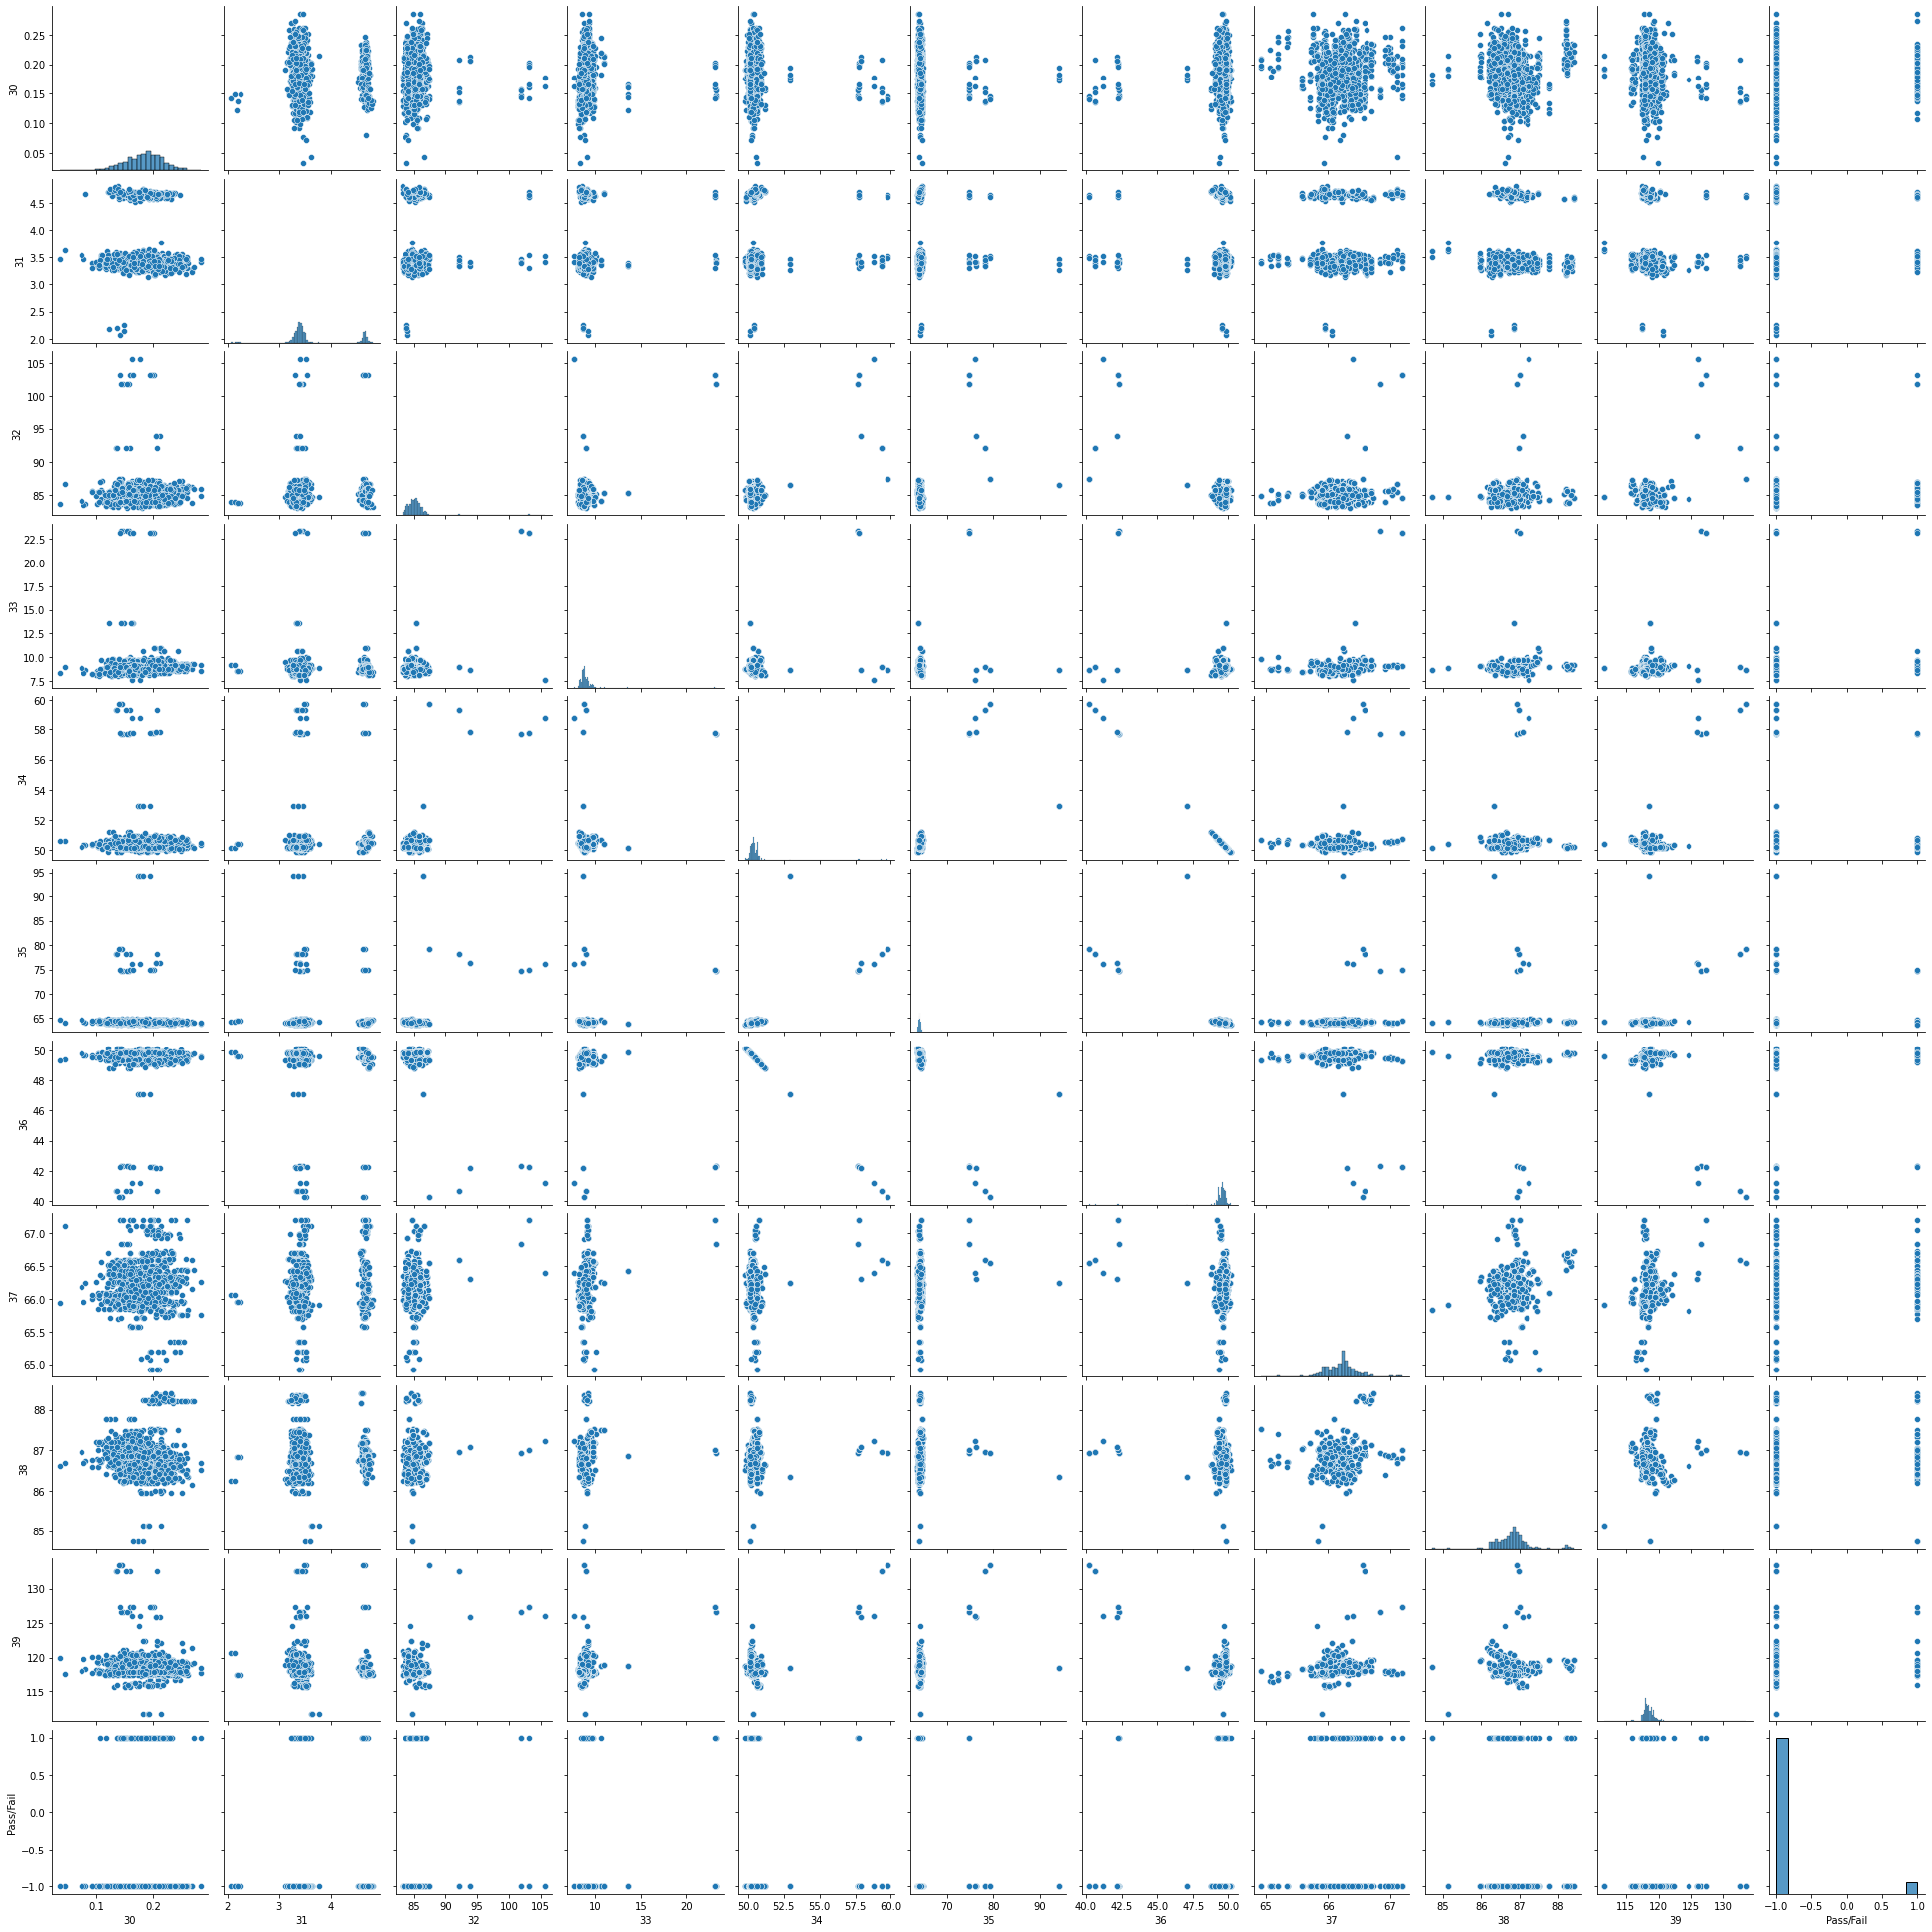

In [500]:
temp = X_train.iloc[:,30:40]
temp = pd.concat([temp, y_train], axis=1)
sns.pairplot(temp)

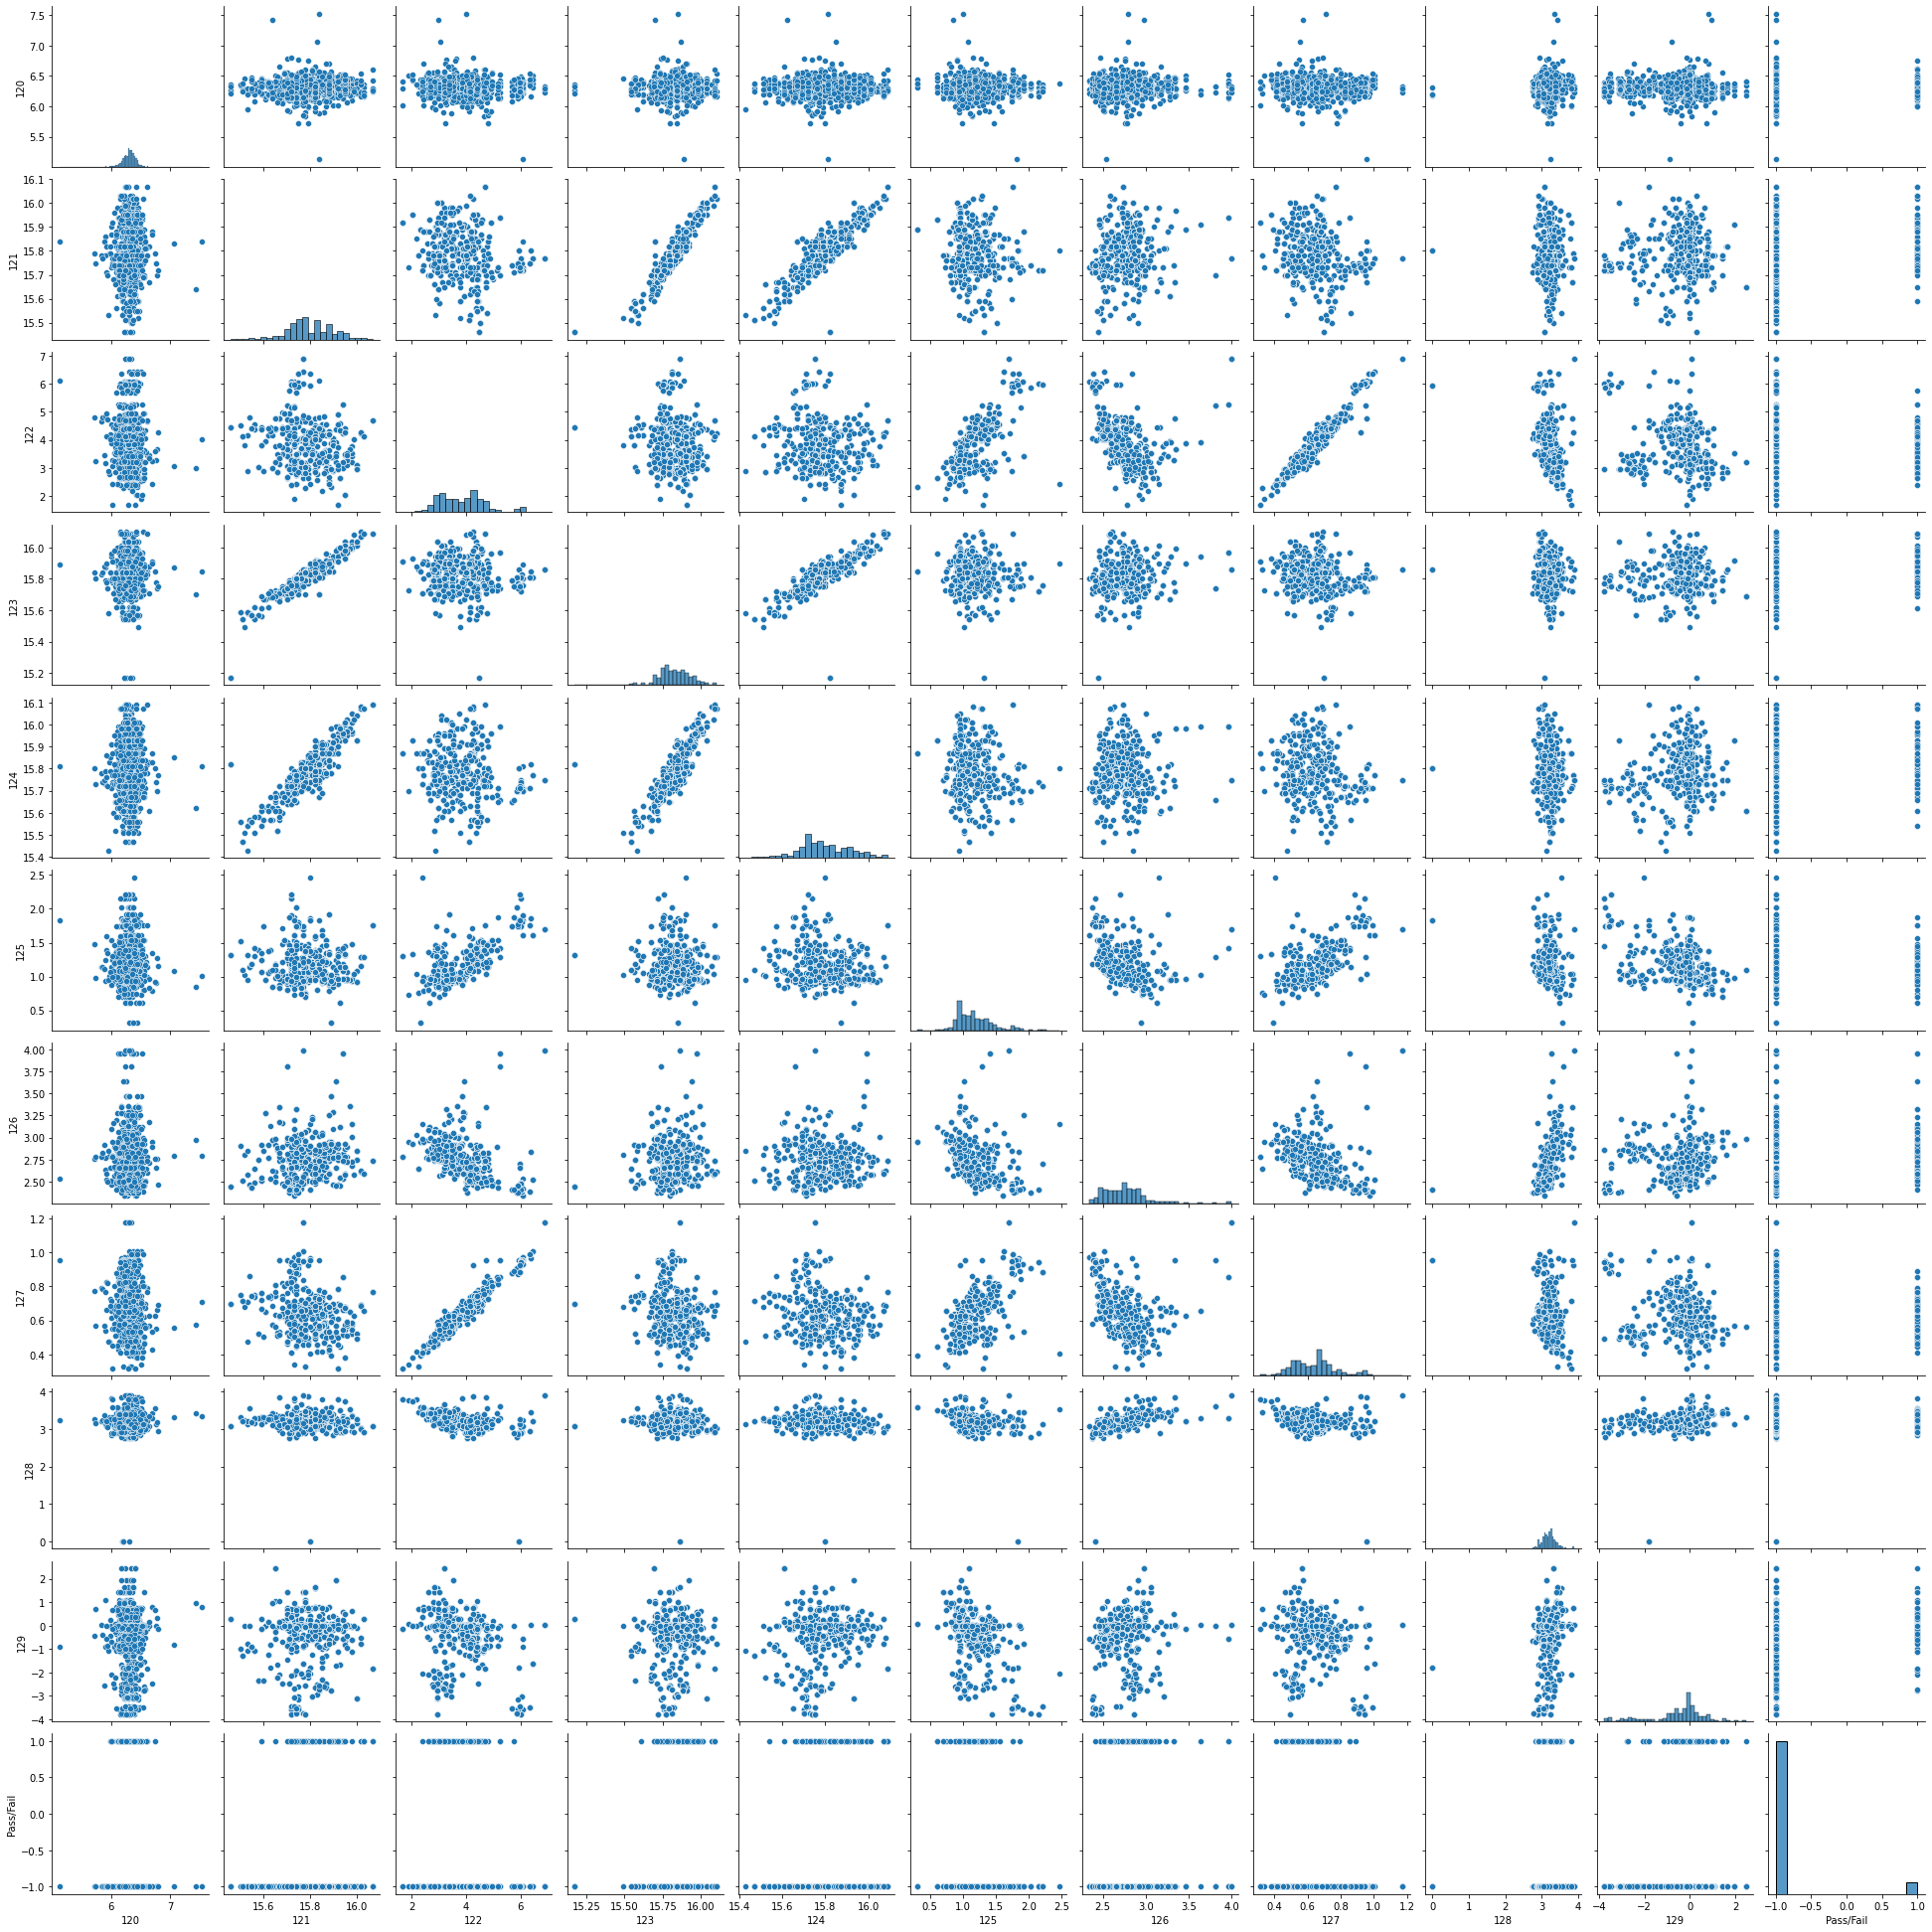

In [501]:
temp = X_train.iloc[:,120:130]
temp = pd.concat([temp, y_train], axis=1)
sns.pairplot(temp)

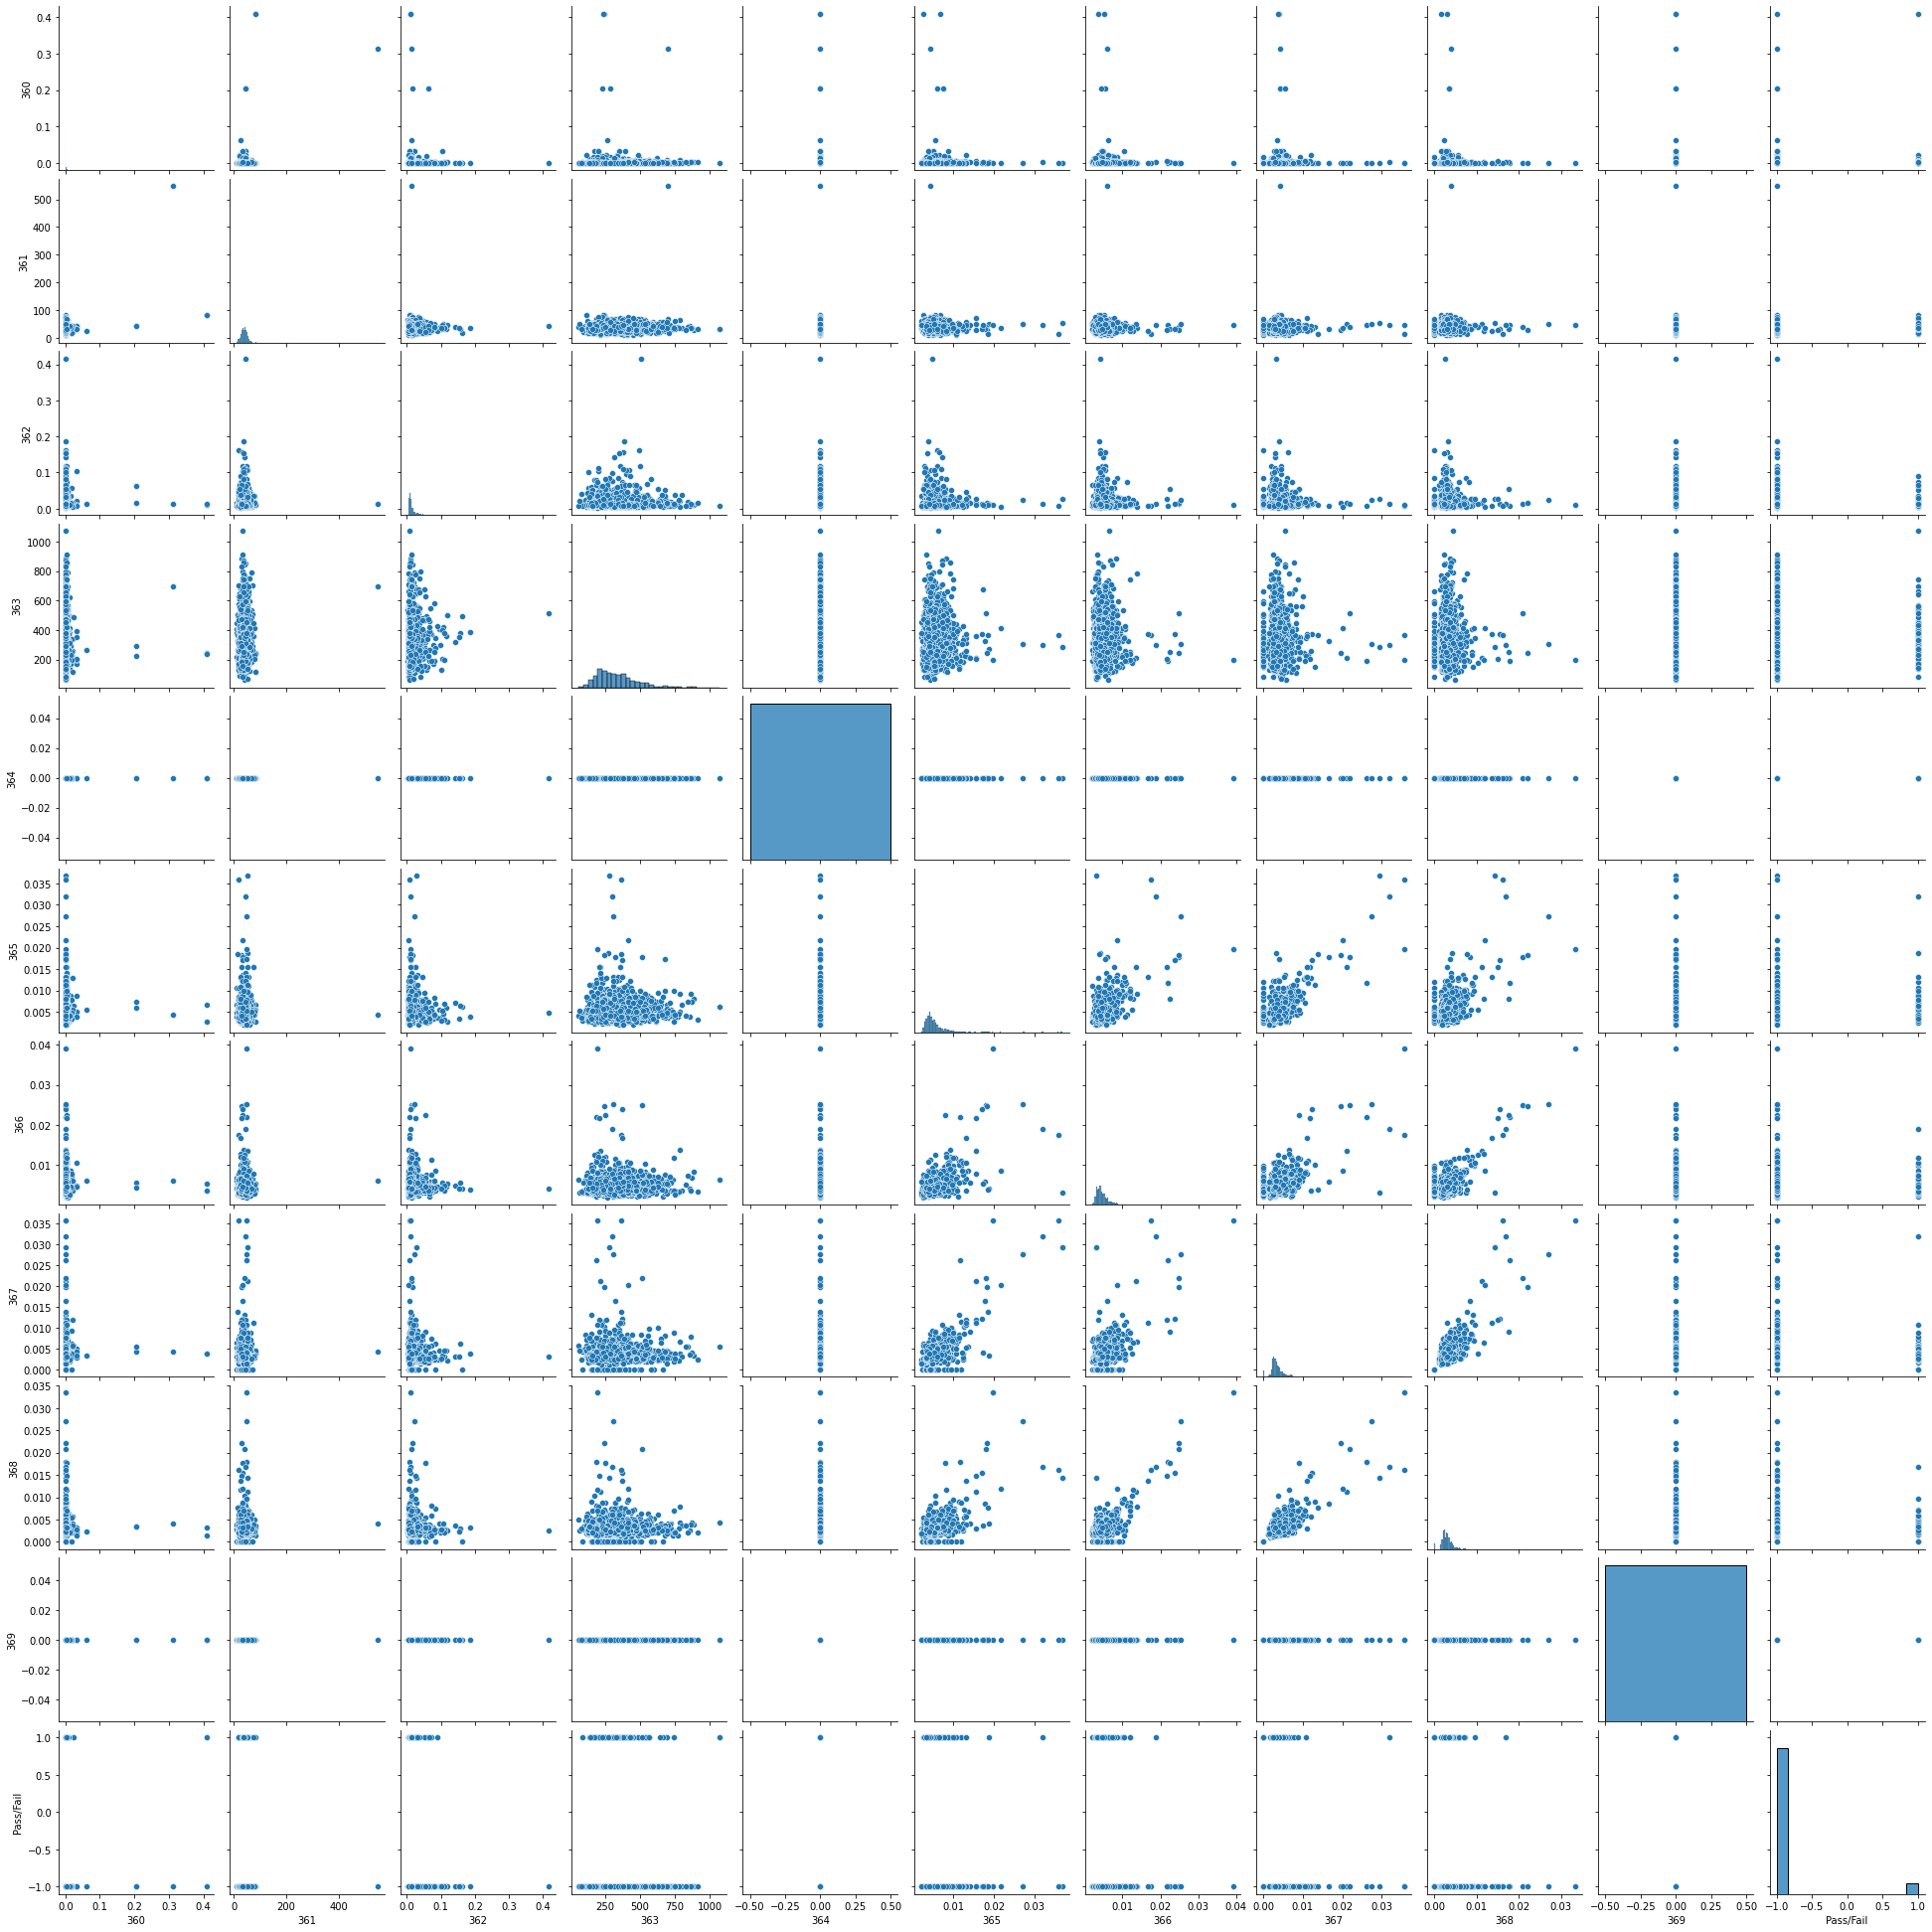

In [502]:
temp = X_train.iloc[:,360:370]
temp = pd.concat([temp, y_train], axis=1)
sns.pairplot(temp)

# Z score による外れ値

In [503]:
X_train

0        1          2          3       4      5         6       7  \
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
5     2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
6     3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
...       ...      ...        ...        ...     ...    ...       ...     ...   
1560  2770.40  2549.42  2204.2889  2637.9989  1.5549  100.0   86.1089  0.1234   
1561  2951.14  2326.59  2212.6334  1081.5662  1.0096  100.0  113.4278  0.1253   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   98.7978  0.1213   

           8       9  ...     580       581     582     583     584      585  \
1     1.4966 -0.0005  ...  0.0060  208.2045  0.5019  0.0223  0.0055   4.4447   
2     1.4436  0.0041  ...  0.0148   82.8602  0.4958  0.0157  0.0039   3.1745   
4     1.5031 -0.0031  ...     NaN       NaN  0.4800  0.4766  0.1045  99.3032   
5     1.5287  0.0167  ...  0.0052   44.0077  0.4949  0.0189  0.0044   3.8276   
6     1.5816 -0.0270  ...     NaN       NaN  0.5010  0.0143  0.0042   2.8515   
...      ...     ...  ...     ...       ...     ...     ...     ...      ...   
1560  1.2811  0.0037  ...  0.0042  127.3154  0.5009  0.0155  0.0036   3.0997   
1561  1.4492 -0.0134  ...  0.0051   46.4573  0.4965  0.0118  0.0032   2.3817   
1563  1.4333 -0.0061  ...     NaN       NaN  0.4975  0.0131  0.0036   2.6238   
1564     NaN     NaN  ...  0.0025   43.5231  0.4987  0.0153  0.0041   3.0590   
1565  1.4622 -0.0072  ...  0.0075   93.4941  0.5004  0.0178  0.0038   3.5662   

         586     587     588       589  
1     0.0096  0.0201  0.0060  208.2045  
2     0.0584  0.0484  0.0148   82.8602  
4     0.0202  0.0149  0.0044   73.8432  
5     0.0342  0.0151  0.0052   44.0077  
6     0.0342  0.0151  0.0052   44.0077  
...      ...     ...     ...       ...  
1560  0.0105  0.0133  0.0042  127.3154  
1561  0.0320  0.0148  0.0051   46.4573  
1563  0.0068  0.0138  0.0047  203.1720  
1564  0.0197  0.0086  0.0025   43.5231  
1565  0.0262  0.0245  0.0075   93.4941  

[1253 rows x 590 columns]

In [504]:
zscore_df = stats.zscore(X_train, nan_policy='omit')
for i in zscore_df.columns:
    zscore_df[i] = zscore_df[i].apply(lambda x: 1 if abs(x) >= 3 else 0)
zscore_df

0  1  2  3  4  5  6  7  8  9  ...  580  581  582  583  584  585  586  \
1     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4     0  0  0  0  0  0  0  0  0  0  ...    0    0    1    1    1    1    0   
5     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
6     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
1560  1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1561  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1563  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1564  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1565  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

      587  588  589  
1       0    0    0  
2       1    1    0  
4       0    0    0  
5       0    0    0  
6       0    0    0  
...   ...  ...  ...  
1560    0    0    0  
1561    0    0    0  
1563    0    0    0  
1564    0    0    0  
1565    0    0    0  

[1253 rows x 590 columns]

In [505]:
col_outlier_count = pd.DataFrame(pd.DataFrame(zscore_df.sum(), columns=['Count'])['Count'].sort_values(ascending=False))
col_outlier_count

Count
576     56
574     56
38      55
577     53
572     51
..     ...
402      0
403      0
404      0
405      0
13       0

[590 rows x 1 columns]

In [506]:
row_outlier_count = pd.DataFrame(zscore_df.sum(axis=1), columns=['Count'])
pd.DataFrame(row_outlier_count['Count'].sort_values(ascending=False))

Count
634      52
1458     47
275      47
457      45
466      35
...     ...
390       0
1330      0
388       0
1051      0
863       0

[1253 rows x 1 columns]

<AxesSubplot:ylabel='Count'>

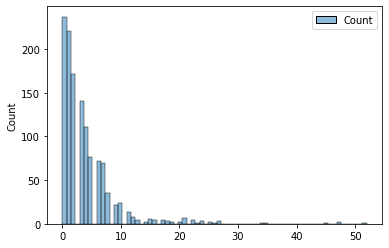

In [507]:
sns.histplot(row_outlier_count)

In [508]:
pd.DataFrame(zscore_df.sum(axis=1), columns=['Count'])

Count
1         3
2        11
4        10
5         7
6         0
...     ...
1560      4
1561      1
1563      4
1564      0
1565      2

[1253 rows x 1 columns]

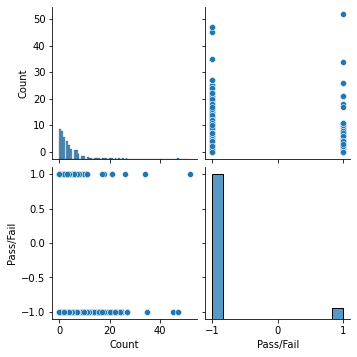

In [509]:
#the correlation between outlier count in each sample and pass/fail
outlier_count = pd.DataFrame(zscore_df.sum(axis=1), columns=['Count'])
outlier_count['Pass/Fail'] = y_train
sns.pairplot(outlier_count)

# Using IQR to remove outliers by applying capping method

モデルを学習させることや統計解析などをするために、事前にデータが正規分布に従うことを確保した方がいい。
ある説明変数で大きすぎる外れ値があるので、対数変換などの手法を行っても、その説明変数が正規分布に従わない。（外れ値の影響が大きすぎる）
also, if the data range is too large caused by extreme outliers, i think it could affect the standardization effect, and thus the model performance
ですから、対数変換の前に/対数変換の代わりに、外れ値を処理しないといけない。

そして、欠損値を事前に埋めることにしない方がいい。なぜなら、中間値などで埋めれば、変数の正規分布を変えることになる。つまり、歪度を変えることになる。

In [510]:
# skewness before apply capping

skewed_feats = X_train.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness = pd.DataFrame({'Skew' : skewed_feats})
skewness.head(10)

Skew
390  35.344260
252  35.342963
287  35.308389
152  35.307400
74   35.284569
209  35.284569
478  35.284569
206  35.284569
347  35.284569
342  35.284569

In [511]:
# skewness before apply capping
skewness.tail(10)

Skew
36   -6.632530
72   -6.853162
87   -7.084761
112  -8.486896
570  -8.823476
19   -9.443878
11  -10.881129
7   -11.662356
109 -18.841414
17  -21.608578

<AxesSubplot:xlabel='576', ylabel='Count'>

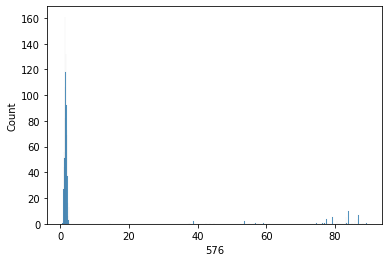

In [512]:
sns.histplot(X_train['576'])

<AxesSubplot:xlabel='576', ylabel='Count'>

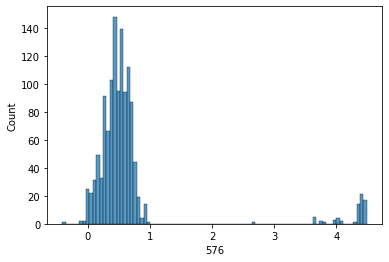

In [513]:
# even applied log transform, 
# the normality is bad and the range is still too large for standardization

temp = np.log(X_train['576'])
sns.histplot(temp)

In [514]:
skew(temp)

3.568154306091109

<AxesSubplot:xlabel='576', ylabel='Count'>

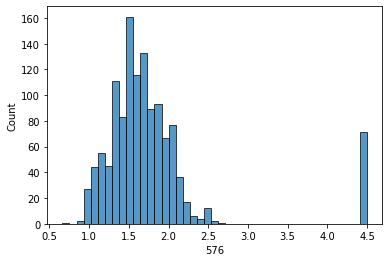

In [515]:
# try to apply capping by using IQR

percent25 = X_train['321'].quantile(0.25)
percent75 = X_train['321'].quantile(0.75)
iqr = percent75 - percent25
upper_limit = percent75 + iqr*2
lower_limit = percent25 - iqr*2
# outlier_colname = i + '_outlier'
# X_train[outlier_colname] = X_train[i].apply(lambda x: 1 if x > upper_limit else (1 if x < lower_limit else 0))
temp = X_train['576'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
sns.histplot(temp)

In [516]:
skew(temp)

#skewness is improved more with this method

2.7572038753792025

In [517]:
#capping outliers

for i in X_train.columns:
    percent25 = X_train[i].quantile(0.25)
    percent75 = X_train[i].quantile(0.75)
    iqr = percent75 - percent25
    upper_limit = percent75 + iqr*2
    lower_limit = percent25 - iqr*2
    # outlier_colname = i + '_outlier'
    # X_train[outlier_colname] = X_train[i].apply(lambda x: 1 if x > upper_limit else (1 if x < lower_limit else 0))
    X_train[i] = X_train[i].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
    

In [518]:
zscore_df = stats.zscore(X_train, nan_policy='omit')
for i in zscore_df.columns:
    zscore_df[i] = zscore_df[i].apply(lambda x: 1 if abs(x) >= 3 else 0)

col_outlier_count = pd.DataFrame(pd.DataFrame(zscore_df.sum(), columns=['Count'])['Count'].sort_values(ascending=False))
col_outlier_count

Count
295     49
160     49
135     43
214     41
140     39
..     ...
292      0
290      0
287      0
284      0
589      0

[590 rows x 1 columns]

In [519]:
# skewness after apply capping

skewed_feats = X_train.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness = pd.DataFrame({'Skew' : skewed_feats})
skewness.head(10)

Skew
360  1.445757
494  1.412763
222  1.407932
552  1.397550
549  1.394214
428  1.352257
382  1.346332
297  1.344185
519  1.341959
247  1.341796

In [520]:
# skewness after apply capping
skewness.tail(10)

Skew
129 -0.734719
571 -0.745536
36  -0.835639
25  -0.967247
56  -1.005576
27  -1.065007
40  -1.106608
26  -1.152349
87  -1.186116
116 -1.387382

# 欠損値処理

In [521]:
total_null = X_train.isnull().sum().sort_values(ascending=False)
percent_null = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
missing_data.head(50)

Total   Percent
158   1147  0.915403
292   1147  0.915403
157   1147  0.915403
293   1147  0.915403
220   1072  0.855547
358   1072  0.855547
85    1072  0.855547
492   1072  0.855547
383    817  0.652035
384    817  0.652035
244    817  0.652035
246    817  0.652035
516    817  0.652035
517    817  0.652035
518    817  0.652035
109    817  0.652035
110    817  0.652035
111    817  0.652035
245    817  0.652035
382    817  0.652035
579    766  0.611333
581    766  0.611333
580    766  0.611333
578    766  0.611333
72     637  0.508380
346    637  0.508380
345    637  0.508380
73     637  0.508380
385    563  0.449322
112    563  0.449322
519    563  0.449322
247    563  0.449322
546    210  0.167598
547    210  0.167598
557    210  0.167598
548    210  0.167598
549    210  0.167598
550    210  0.167598
551    210  0.167598
552    210  0.167598
553    210  0.167598
554    210  0.167598
555    210  0.167598
556    210  0.167598
569    203  0.162011
568    203  0.162011
567    203  0.162011
566    203  0.162011
562    203  0.162011
565    203  0.162011

<AxesSubplot:>

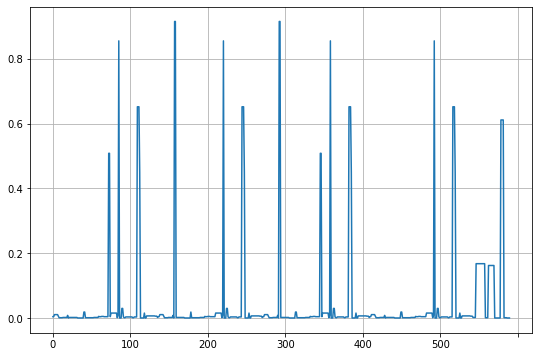

In [522]:
#null count plot per features

null_count = X_train.isnull().sum()/X_train.isnull().count()
null_count.plot(figsize=(9,6), grid=True)

<AxesSubplot:>

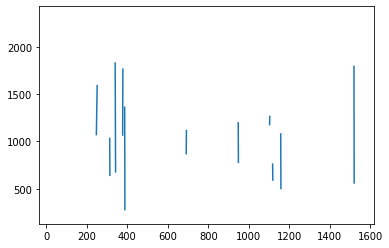

In [523]:
# 欠損値91%

X_train['158'].plot()

<AxesSubplot:>

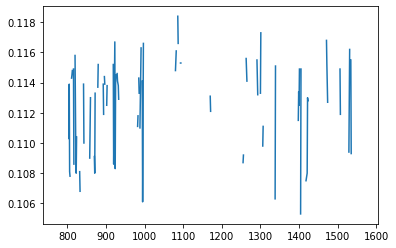

In [524]:
# 欠損値86%
X_train['85'].plot()

<AxesSubplot:>

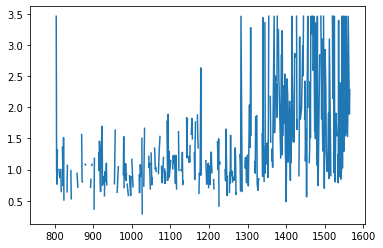

In [525]:
# 欠損値65%
X_train['517'].plot()

<AxesSubplot:>

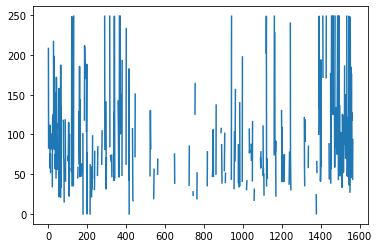

In [526]:
# 欠損値61%
X_train['581'].plot()

<AxesSubplot:>

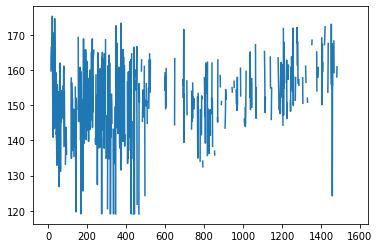

In [527]:
# 欠損値51%
X_train['72'].plot()

In [528]:
# 欠損値が8割以上列を削除
print('before: {}'.format(X_train.shape))
X_train = X_train.drop(missing_data[missing_data['Percent'] > 0.8].index, axis=1)
print('after: {}'.format(X_train.shape))


before: (1253, 590)
after: (1253, 582)


In [529]:
# 特徴量の欠損値を新たな特徴量として抽出する

X_train_nulltable = X_train.copy()
X_train_nulltable = X_train_nulltable.isnull()

for i in X_train_nulltable.columns:
    new_colname = i + '_null'
    X_train_nulltable[i] = X_train_nulltable[i].apply(lambda x: 1 if x else 0)
    X_train_nulltable = X_train_nulltable.rename({i : new_colname}, axis=1)


In [530]:
X_train_nulltable

0_null  1_null  2_null  3_null  4_null  5_null  6_null  7_null  8_null  \
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1560       0       0       0       0       0       0       0       0       0   
1561       0       0       0       0       0       0       0       0       0   
1563       0       0       0       0       0       0       0       0       0   
1564       0       0       0       0       0       0       0       0       1   
1565       0       0       0       0       0       0       0       0       0   

      9_null  ...  580_null  581_null  582_null  583_null  584_null  585_null  \
1          0  ...         0         0         0         0         0         0   
2          0  ...         0         0         0         0         0         0   
4          0  ...         1         1         0         0         0         0   
5          0  ...         0         0         0         0         0         0   
6          0  ...         1         1         0         0         0         0   
...      ...  ...       ...       ...       ...       ...       ...       ...   
1560       0  ...         0         0         0         0         0         0   
1561       0  ...         0         0         0         0         0         0   
1563       0  ...         1         1         0         0         0         0   
1564       1  ...         0         0         0         0         0         0   
1565       0  ...         0         0         0         0         0         0   

      586_null  587_null  588_null  589_null  
1            0         0         0         0  
2            0         0         0         0  
4            0         0         0         0  
5            0         0         0         0  
6            0         0         0         0  
...        ...       ...       ...       ...  
1560         0         0         0         0  
1561         0         0         0         0  
1563         0         0         0         0  
1564         0         0         0         0  
1565         0         0         0         0  

[1253 rows x 582 columns]

In [531]:
# 他の欠損値ある列の欠損値を中間値で埋める

X_train = X_train.fillna(X_train.median())
X_train.isnull().sum().value_counts()

0    582
dtype: int64

<AxesSubplot:>

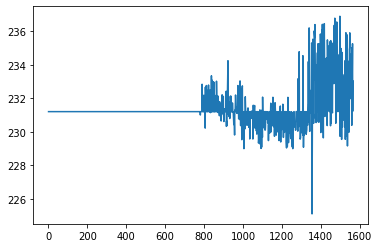

In [532]:
X_train['111'].plot()

# データ整理

In [533]:
# check features with 0 variance

count = 0
for i in X_train.columns:
    if 0 < X_train[i].value_counts().shape[0] <= 2:
        print(i, X_train[i].value_counts().shape[0])
        count = count + 1

print(count)

5 1
13 1
42 1
49 1
52 1
69 1
74 1
97 1
114 1
141 1
149 1
178 1
179 1
186 1
189 1
190 1
191 1
192 1
193 1
194 1
206 1
209 1
226 1
229 1
230 1
231 1
232 1
233 1
234 1
235 1
236 1
237 1
240 1
241 1
242 1
243 1
249 1
256 1
257 1
258 1
259 1
260 1
261 1
262 1
263 1
264 1
265 1
266 1
276 1
284 1
313 1
314 1
315 1
322 1
325 1
326 1
327 1
328 1
329 1
330 1
342 1
347 1
364 1
369 1
370 1
371 1
372 1
373 1
374 1
375 1
378 1
379 1
380 1
381 1
387 1
394 1
395 1
396 1
397 1
398 1
399 1
400 1
401 1
402 1
403 1
404 1
414 1
422 1
449 1
450 1
451 1
458 1
461 1
462 1
463 1
464 1
465 1
466 1
478 1
481 1
498 1
501 1
502 1
503 1
504 1
505 1
506 1
507 1
508 1
509 1
512 1
513 1
514 1
515 1
521 1
528 1
529 1
530 1
531 1
532 1
533 1
534 1
535 1
536 1
537 1
538 1
126


<AxesSubplot:>

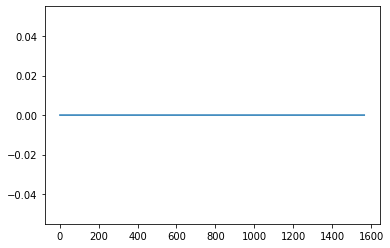

In [534]:
X_train['538'].plot()

In [535]:
# delete features with 0 variance

varThres = VarianceThreshold(threshold=0)
varThres.fit(X_train)


X_train = X_train.loc[:, varThres.get_support()]

X_train

0        1          2           3       4         6       7  \
1     3095.7800  2465.14  2230.4222  1463.66060  0.8294  102.3433  0.1247   
2     2932.6100  2559.94  2186.4111  1698.01720  1.5102   95.4878  0.1241   
4     3032.2400  2502.87  2233.3667  1326.52000  1.5334  100.3967  0.1235   
5     2946.2500  2432.84  2233.3667  1326.52000  1.5334  100.3967  0.1235   
6     3030.2700  2430.12  2230.4222  1463.66060  0.8294  102.3433  0.1247   
...         ...      ...        ...         ...     ...       ...     ...   
1560  2789.6475  2549.42  2204.2889  2607.06325  1.5549   86.1089  0.1234   
1561  2951.1400  2326.59  2212.6334  1081.56620  1.0096  113.4278  0.1253   
1563  3052.3100  2522.55  2198.5667  1124.65950  0.8763   98.4689  0.1205   
1564  2978.8100  2379.78  2206.3000  1110.49670  0.8236   99.4122  0.1208   
1565  2894.9200  2532.01  2177.0333  1183.72870  1.5726   98.7978  0.1213   

           8        9      10  ...     580       581     582     583     584  \
1     1.4966 -0.00050 -0.0148  ...  0.0060  208.2045  0.5019  0.0223  0.0055   
2     1.4436  0.00410  0.0013  ...  0.0127   82.8602  0.4958  0.0157  0.0039   
4     1.5031 -0.00310 -0.0072  ...  0.0047   72.2002  0.4889  0.0266  0.0061   
5     1.5287  0.01670  0.0055  ...  0.0052   44.0077  0.4949  0.0189  0.0044   
6     1.5816 -0.02700  0.0105  ...  0.0047   72.2002  0.5010  0.0143  0.0042   
...      ...      ...     ...  ...     ...       ...     ...     ...     ...   
1560  1.2811  0.00370  0.0017  ...  0.0042  127.3154  0.5009  0.0155  0.0036   
1561  1.4492 -0.01340  0.0127  ...  0.0051   46.4573  0.4965  0.0118  0.0032   
1563  1.4333 -0.00610 -0.0093  ...  0.0047   72.2002  0.4975  0.0131  0.0036   
1564  1.4615 -0.00055  0.0004  ...  0.0025   43.5231  0.4987  0.0153  0.0041   
1565  1.4622 -0.00720  0.0032  ...  0.0075   93.4941  0.5004  0.0178  0.0038   

           585     586     587     588       589  
1     4.444700  0.0096  0.0201  0.0060  208.2045  
2     3.174500  0.0554  0.0403  0.0126   82.8602  
4     5.366175  0.0202  0.0149  0.0044   73.8432  
5     3.827600  0.0342  0.0151  0.0052   44.0077  
6     2.851500  0.0342  0.0151  0.0052   44.0077  
...        ...     ...     ...     ...       ...  
1560  3.099700  0.0105  0.0133  0.0042  127.3154  
1561  2.381700  0.0320  0.0148  0.0051   46.4573  
1563  2.623800  0.0068  0.0138  0.0047  203.1720  
1564  3.059000  0.0197  0.0086  0.0025   43.5231  
1565  3.566200  0.0262  0.0245  0.0075   93.4941  

[1253 rows x 456 columns]

In [536]:
# check and delete null table feature with 0 variance, 
# which means no null values in that feature

count = 0
for i in X_train_nulltable.columns:
    if 0 < X_train_nulltable[i].value_counts().shape[0] <= 1:
        count = count + 1

before = X_train_nulltable.shape[1]

print('Before: ' + str(before))

varThres = VarianceThreshold(threshold=0)
varThres.fit(X_train_nulltable)

X_train_nulltable = X_train_nulltable.loc[:, varThres.get_support()]

print('After: ' + str(X_train_nulltable.shape[1]))

X_train_nulltable

Before: 582
After: 494


0_null  1_null  2_null  3_null  4_null  5_null  6_null  7_null  8_null  \
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1560       0       0       0       0       0       0       0       0       0   
1561       0       0       0       0       0       0       0       0       0   
1563       0       0       0       0       0       0       0       0       0   
1564       0       0       0       0       0       0       0       0       1   
1565       0       0       0       0       0       0       0       0       0   

      9_null  ...  568_null  569_null  578_null  579_null  580_null  581_null  \
1          0  ...         1         1         0         0         0         0   
2          0  ...         0         0         0         0         0         0   
4          0  ...         1         1         1         1         1         1   
5          0  ...         0         0         0         0         0         0   
6          0  ...         1         1         1         1         1         1   
...      ...  ...       ...       ...       ...       ...       ...       ...   
1560       0  ...         0         0         0         0         0         0   
1561       0  ...         1         1         0         0         0         0   
1563       0  ...         0         0         1         1         1         1   
1564       1  ...         0         0         0         0         0         0   
1565       0  ...         0         0         0         0         0         0   

      582_null  583_null  584_null  585_null  
1            0         0         0         0  
2            0         0         0         0  
4            0         0         0         0  
5            0         0         0         0  
6            0         0         0         0  
...        ...       ...       ...       ...  
1560         0         0         0         0  
1561         0         0         0         0  
1563         0         0         0         0  
1564         0         0         0         0  
1565         0         0         0         0  

[1253 rows x 494 columns]

# 特徴量抽出

In [566]:
# using select k best with ANOVA test to filter weak correlation features 

fs = SelectKBest(score_func=f_classif, k=10)
X_selected = pd.DataFrame(fs.fit_transform(X_train, y_train), columns=X_train.columns.values[fs.get_support()])

X_selected

C:\Users\user\Desktop\Python_DataScience\UCI_SECOM_dataset\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


59     103    205      247     341      346     348     477  \
0      0.8073 -0.0045   8.96  0.02690  2.4278  3.04650  0.0142  5.8042   
1     16.6014 -0.0026  13.30  0.11405  3.7663  7.04845  0.0105  9.1221   
2    -12.2945 -0.0045   9.09  0.02690  3.0939  3.04650  0.0246  6.1979   
3     16.6014 -0.0052  12.32  0.02170  3.7242  3.04650  0.0166  8.5143   
4      2.1109 -0.0042  13.41  0.02690  4.1816  3.04650  0.0177  8.8016   
...       ...     ...    ...      ...     ...      ...     ...     ...   
1248   3.4827 -0.0114   3.62  0.02690  1.1261  3.04650  0.0225  2.4138   
1249   4.6227 -0.0134   5.52  0.02690  1.8641  3.04650  0.0225  3.6709   
1250  -3.3555 -0.0116   9.54  0.02690  2.9633  3.05910  0.0225  6.5896   
1251   1.1664 -0.0142   5.33  0.02690  1.7756  3.04650  0.0225  3.4878   
1252   4.4682 -0.0087  11.72  0.02690  2.9282  3.04650  0.0225  7.6907   

             510       519  
0     122.583975   5.80640  
1     122.583975  24.35425  
2     122.583975   5.80640  
3      68.735100   4.66870  
4     122.583975   5.80640  
...          ...       ...  
1248   49.945200   5.80640  
1249   38.202200   5.80640  
1250   29.437200   5.80640  
1251   54.833000   5.80640  
1252   78.499300   5.80640  

[1253 rows x 10 columns]

In [591]:
# p values of each features

selectkbestmodel = fs.fit(X_train, y_train)

pvalues_table = pd.DataFrame(selectkbestmodel.pvalues_, index=X_train.columns.values)

pvalues_table[0].sort_values(ascending=True).head(10)


C:\Users\user\Desktop\Python_DataScience\UCI_SECOM_dataset\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


59     1.345689e-10
103    5.892729e-08
477    1.160857e-06
205    2.035660e-06
247    6.722101e-06
519    7.001797e-06
348    1.027035e-05
510    1.380839e-05
341    1.464664e-05
346    7.058390e-05
Name: 0, dtype: float64

<AxesSubplot:ylabel='Count'>

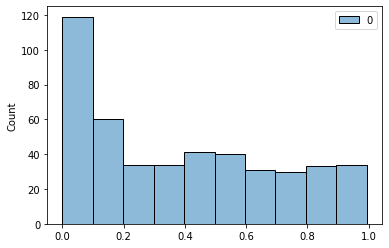

In [592]:
sns.histplot(pvalues_table)

In [585]:
y_train_reset = y_train.reset_index().drop(['index'], axis=1)
total = pd.concat([X_selected, y_train_reset], axis=1)
total

59     103    205      247     341      346     348     477  \
0      0.8073 -0.0045   8.96  0.02690  2.4278  3.04650  0.0142  5.8042   
1     16.6014 -0.0026  13.30  0.11405  3.7663  7.04845  0.0105  9.1221   
2    -12.2945 -0.0045   9.09  0.02690  3.0939  3.04650  0.0246  6.1979   
3     16.6014 -0.0052  12.32  0.02170  3.7242  3.04650  0.0166  8.5143   
4      2.1109 -0.0042  13.41  0.02690  4.1816  3.04650  0.0177  8.8016   
...       ...     ...    ...      ...     ...      ...     ...     ...   
1248   3.4827 -0.0114   3.62  0.02690  1.1261  3.04650  0.0225  2.4138   
1249   4.6227 -0.0134   5.52  0.02690  1.8641  3.04650  0.0225  3.6709   
1250  -3.3555 -0.0116   9.54  0.02690  2.9633  3.05910  0.0225  6.5896   
1251   1.1664 -0.0142   5.33  0.02690  1.7756  3.04650  0.0225  3.4878   
1252   4.4682 -0.0087  11.72  0.02690  2.9282  3.04650  0.0225  7.6907   

             510       519  Pass/Fail  
0     122.583975   5.80640         -1  
1     122.583975  24.35425          1  
2     122.583975   5.80640         -1  
3      68.735100   4.66870         -1  
4     122.583975   5.80640         -1  
...          ...       ...        ...  
1248   49.945200   5.80640         -1  
1249   38.202200   5.80640         -1  
1250   29.437200   5.80640         -1  
1251   54.833000   5.80640         -1  
1252   78.499300   5.80640         -1  

[1253 rows x 11 columns]

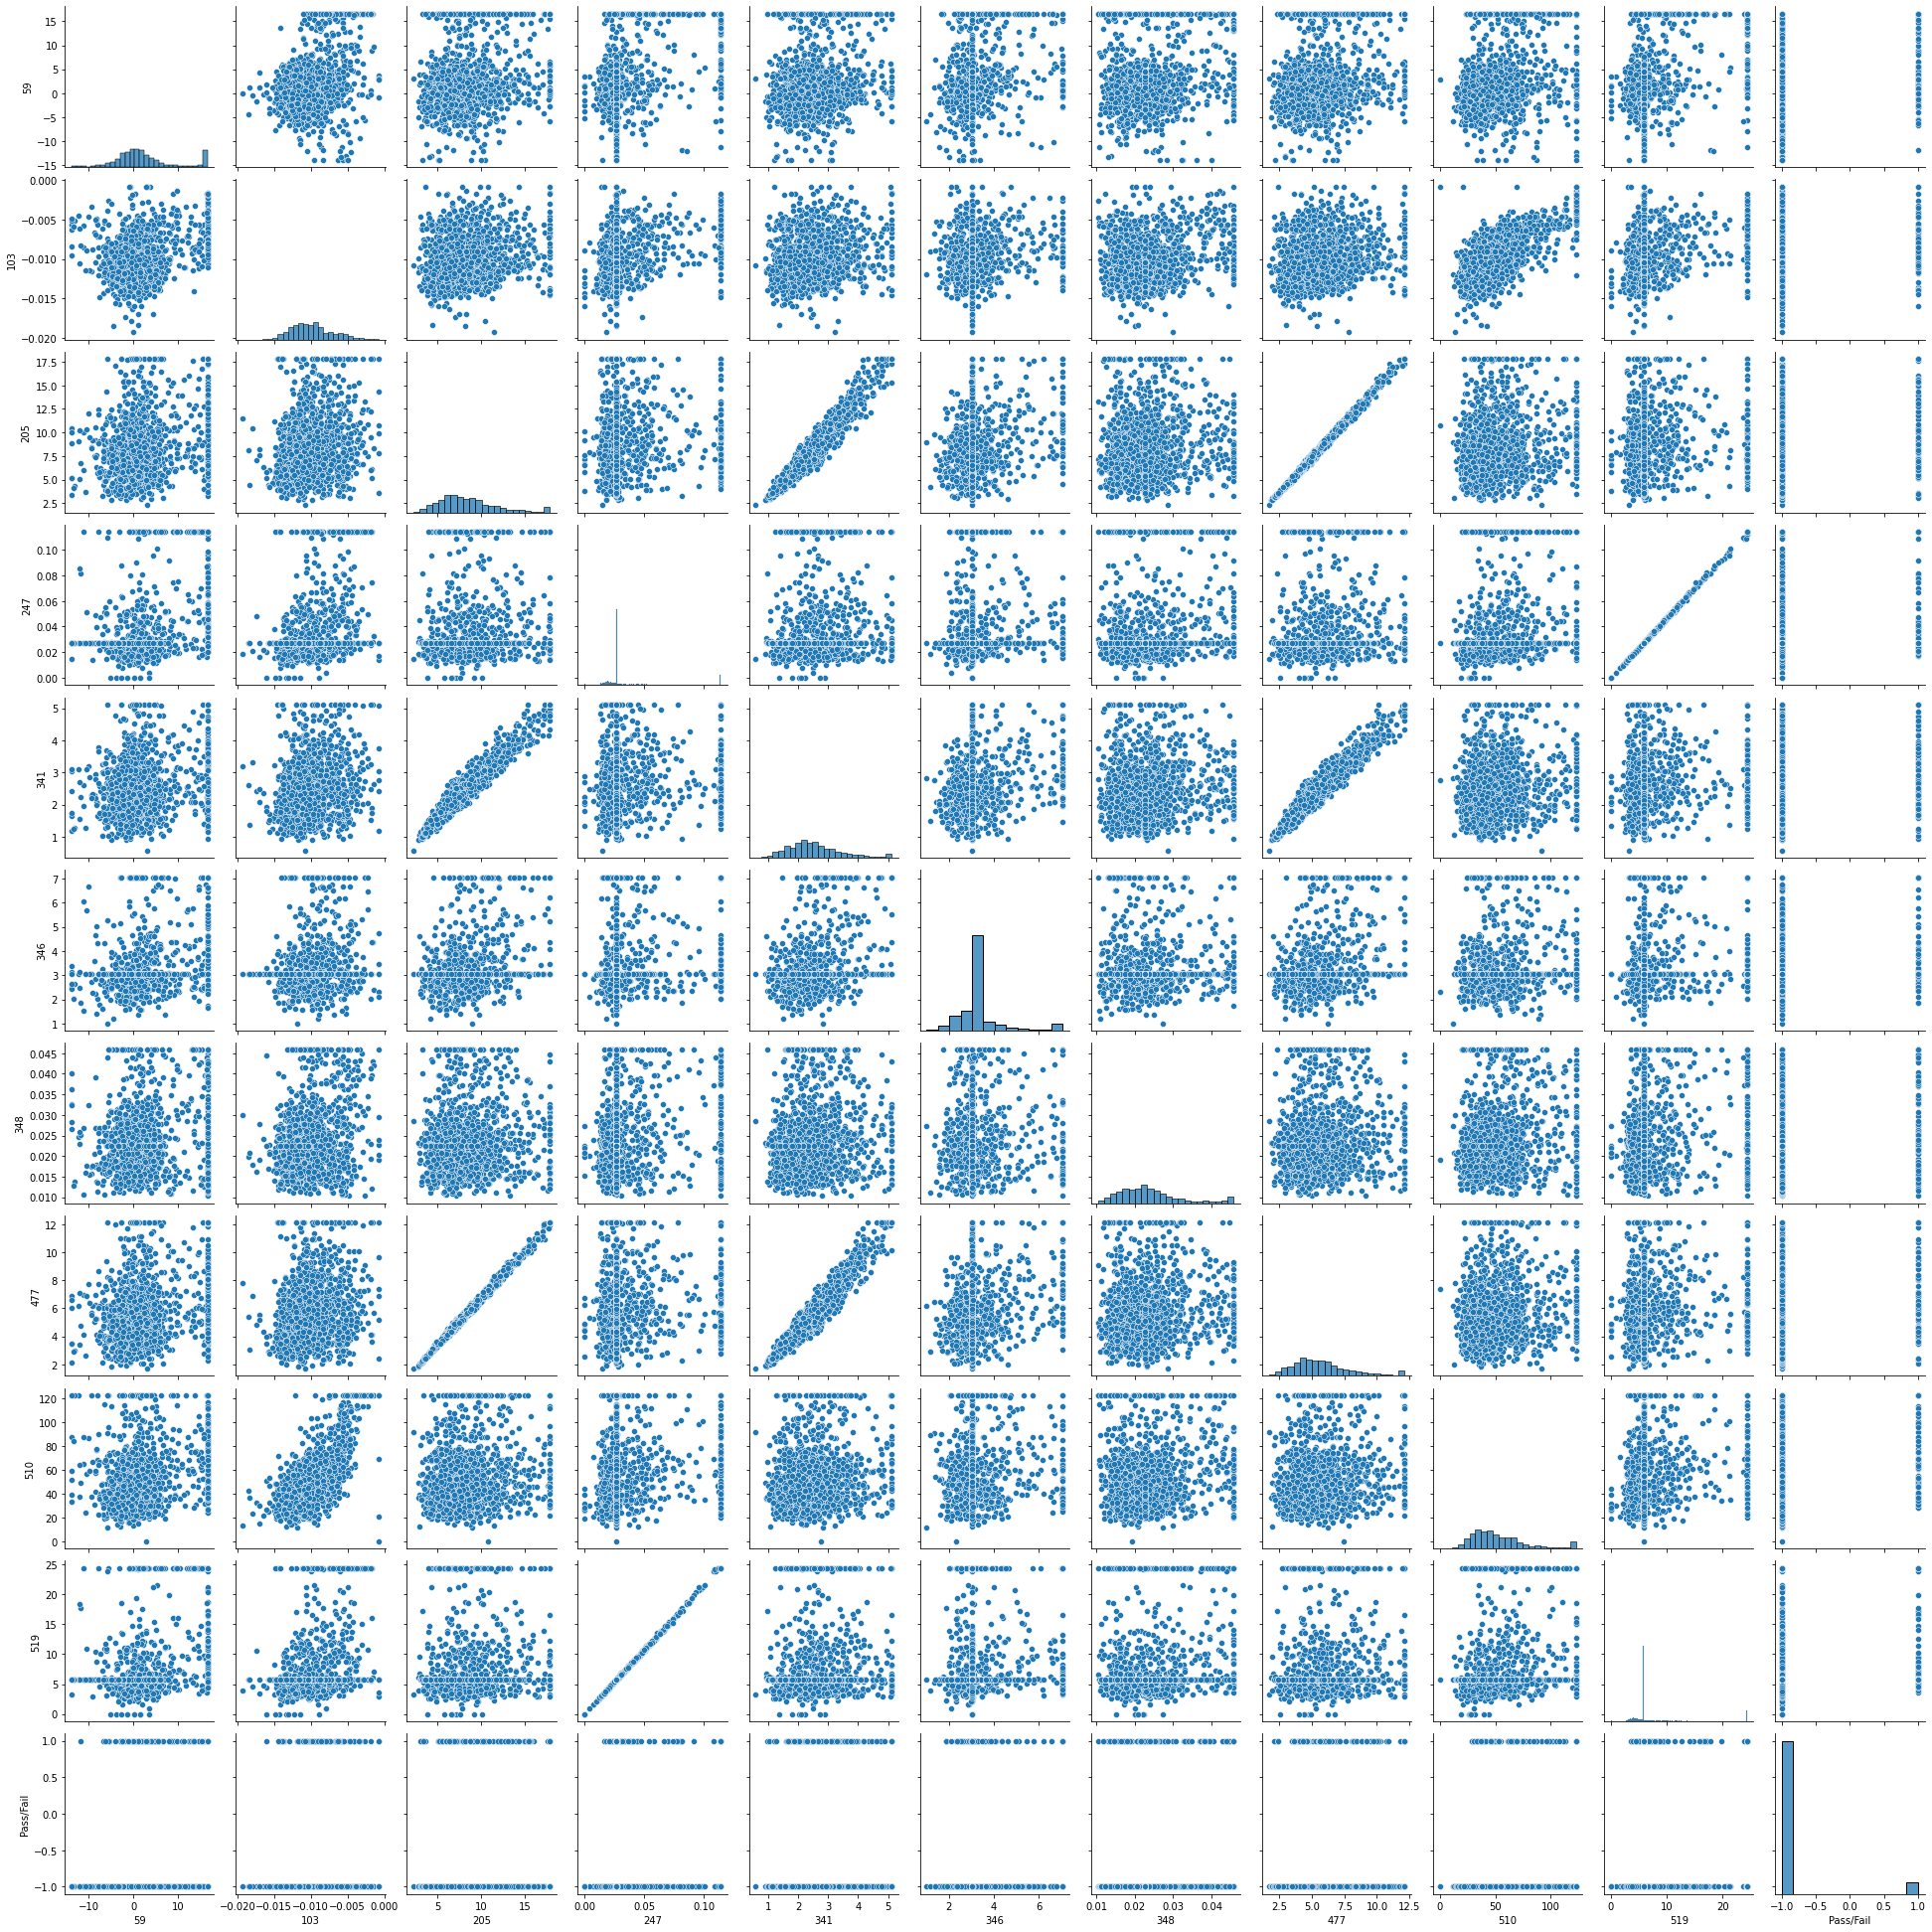

In [586]:
# visualize the correlation between target and 10 selected features

sns.pairplot(pd.DataFrame(total))

In [596]:
X_train.shape

(1253, 456)

In [598]:
pvalues_table[pvalues_table[0] > 0.8]

0
0    0.860271
1    0.993933
3    0.823749
18   0.896942
39   0.855404
..        ...
552  0.853417
554  0.894903
557  0.961530
566  0.935625
589  0.972003

[66 rows x 1 columns]

In [606]:
# remove features with p values larger than 0.8

X_train.drop(pvalues_table[pvalues_table[0] > 0.8].index, axis=1)

2       4         6       7       8        9      10      11  \
1     2230.4222  0.8294  102.3433  0.1247  1.4966 -0.00050 -0.0148  0.9627   
2     2186.4111  1.5102   95.4878  0.1241  1.4436  0.00410  0.0013  0.9615   
4     2233.3667  1.5334  100.3967  0.1235  1.5031 -0.00310 -0.0072  0.9569   
5     2233.3667  1.5334  100.3967  0.1235  1.5287  0.01670  0.0055  0.9699   
6     2230.4222  0.8294  102.3433  0.1247  1.5816 -0.02700  0.0105  0.9591   
...         ...     ...       ...     ...     ...      ...     ...     ...   
1560  2204.2889  1.5549   86.1089  0.1234  1.2811  0.00370  0.0017  0.9578   
1561  2212.6334  1.0096  113.4278  0.1253  1.4492 -0.01340  0.0127  0.9645   
1563  2198.5667  0.8763   98.4689  0.1205  1.4333 -0.00610 -0.0093  0.9618   
1564  2206.3000  0.8236   99.4122  0.1208  1.4615 -0.00055  0.0004  0.9658   
1565  2177.0333  1.5726   98.7978  0.1213  1.4622 -0.00720  0.0032  0.9694   

            12       14  ...     579     580       581     582     583  \
1     200.5470  10.1548  ...  0.0201  0.0060  208.2045  0.5019  0.0223   
2     202.0179   9.5157  ...  0.0394  0.0127   82.8602  0.4958  0.0157   
4     201.9424  10.5661  ...  0.0149  0.0047   72.2002  0.4889  0.0266   
5     200.4720   8.6617  ...  0.0151  0.0052   44.0077  0.4949  0.0189   
6     202.0901   9.0350  ...  0.0149  0.0047   72.2002  0.5010  0.0143   
...        ...      ...  ...     ...     ...       ...     ...     ...   
1560  206.3719  10.0726  ...  0.0133  0.0042  127.3154  0.5009  0.0155   
1561  202.8564   8.9192  ...  0.0148  0.0051   46.4573  0.4965  0.0118   
1563  204.0173   9.1620  ...  0.0149  0.0047   72.2002  0.4975  0.0131   
1564  199.6065   8.9192  ...  0.0086  0.0025   43.5231  0.4987  0.0153   
1565  197.2448   9.7354  ...  0.0245  0.0075   93.4941  0.5004  0.0178   

         584       585     586     587     588  
1     0.0055  4.444700  0.0096  0.0201  0.0060  
2     0.0039  3.174500  0.0554  0.0403  0.0126  
4     0.0061  5.366175  0.0202  0.0149  0.0044  
5     0.0044  3.827600  0.0342  0.0151  0.0052  
6     0.0042  2.851500  0.0342  0.0151  0.0052  
...      ...       ...     ...     ...     ...  
1560  0.0036  3.099700  0.0105  0.0133  0.0042  
1561  0.0032  2.381700  0.0320  0.0148  0.0051  
1563  0.0036  2.623800  0.0068  0.0138  0.0047  
1564  0.0041  3.059000  0.0197  0.0086  0.0025  
1565  0.0038  3.566200  0.0262  0.0245  0.0075  

[1253 rows x 390 columns]

In [607]:
X_train_nulltable

0_null  1_null  2_null  3_null  4_null  5_null  6_null  7_null  8_null  \
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1560       0       0       0       0       0       0       0       0       0   
1561       0       0       0       0       0       0       0       0       0   
1563       0       0       0       0       0       0       0       0       0   
1564       0       0       0       0       0       0       0       0       1   
1565       0       0       0       0       0       0       0       0       0   

      9_null  ...  568_null  569_null  578_null  579_null  580_null  581_null  \
1          0  ...         1         1         0         0         0         0   
2          0  ...         0         0         0         0         0         0   
4          0  ...         1         1         1         1         1         1   
5          0  ...         0         0         0         0         0         0   
6          0  ...         1         1         1         1         1         1   
...      ...  ...       ...       ...       ...       ...       ...       ...   
1560       0  ...         0         0         0         0         0         0   
1561       0  ...         1         1         0         0         0         0   
1563       0  ...         0         0         1         1         1         1   
1564       1  ...         0         0         0         0         0         0   
1565       0  ...         0         0         0         0         0         0   

      582_null  583_null  584_null  585_null  
1            0         0         0         0  
2            0         0         0         0  
4            0         0         0         0  
5            0         0         0         0  
6            0         0         0         0  
...        ...       ...       ...       ...  
1560         0         0         0         0  
1561         0         0         0         0  
1563         0         0         0         0  
1564         0         0         0         0  
1565         0         0         0         0  

[1253 rows x 494 columns]